In [91]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('data/train.csv')

In [92]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [86]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns')

The data has 1460 rows and 81 columns


In [95]:
nan_counts = data.isna().sum()
columns_with_many_nans = nan_counts[nan_counts > 100].index
print("Columns with more than 100 NaN values:")
for col in columns_with_many_nans:
    print(col)

Columns with more than 100 NaN values:
LotFrontage
Alley
MasVnrType
FireplaceQu
PoolQC
Fence
MiscFeature


In [96]:
data = data.drop(columns = columns_with_many_nans)

In [97]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [98]:
for column in data.columns: 
    if len(data[column].unique()) < 20:
        print(f'{column} : {data[column].unique()}')

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' '

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [100]:
data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\Sanje\AppData\Local\Temp\ipykernel_36764\4060181630.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], bins=50);
c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


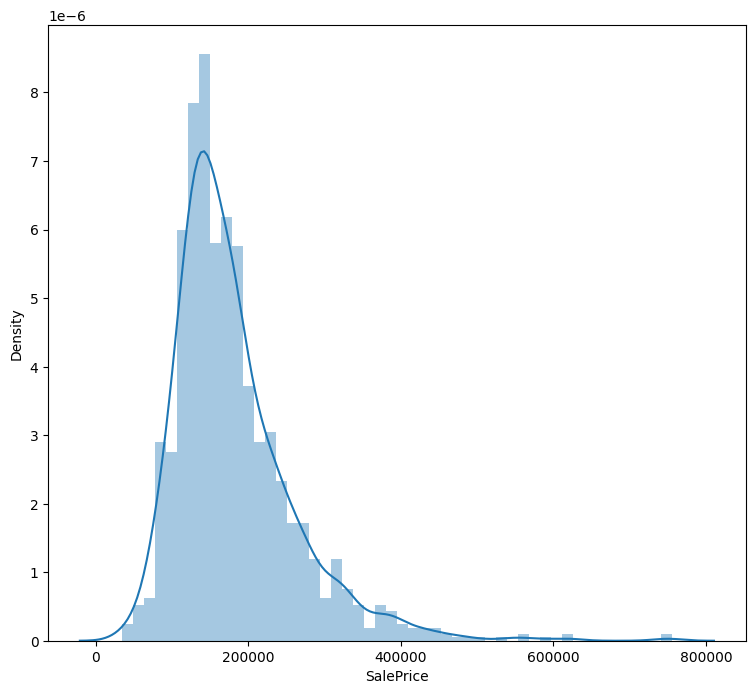

In [101]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], bins=50);

In [74]:
#So we can observe that the price basically falls under the range around 200000.

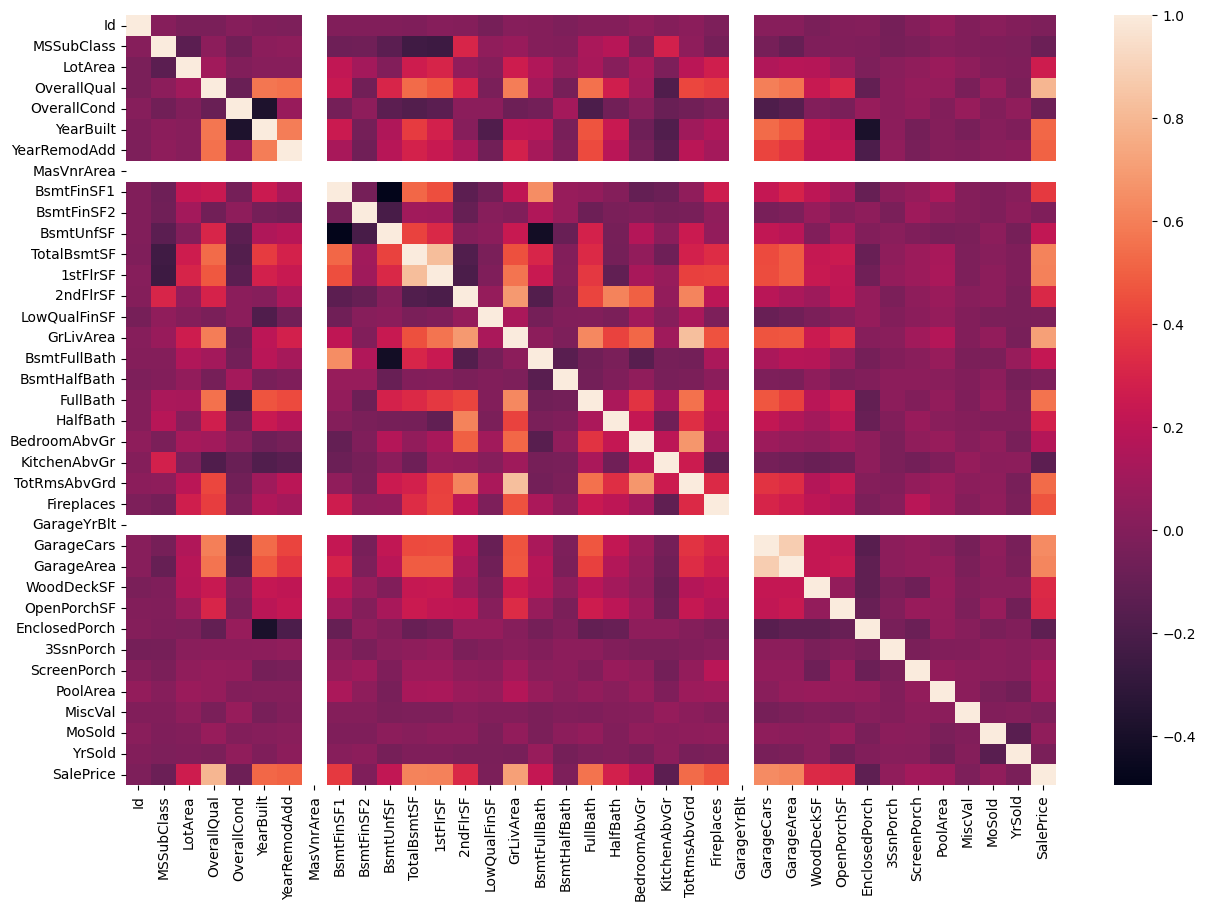

In [102]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = np.corrcoef(numeric_data.values.T)
col_names = numeric_data.columns
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, xticklabels=col_names, yticklabels=col_names)
plt.show()

In [108]:
# Based on some understanding of Google information about House sale pricing and from the data description and from a bIT OF CHATGPT explanation of the data descritption, I was able to build some evident relations
data['overall cond-qual']        = data['OverallQual']  + data['OverallCond']
data['YearRemodAdd-YearBuilt ']  = data['YearRemodAdd'] - data['YearBuilt']
data['first-secondatalrSf']      = data['1stFlrSF']     + data['2ndFlrSF']
data['BsmtBaths']                = data['BsmtFullBath'] + data['BsmtHalfBath']*0.5
data['AboveBaths']               = data['FullBath']     + data['HalfBath']*0.5
data['TotalBaths']               = data['BsmtBaths']    + data['AboveBaths']
data['PorchArea']                = data['OpenPorchSF']  + data['EnclosedPorch'] + data['3SsnPorch']    + data['ScreenPorch']

In [109]:
#Now we shall find the outlier boundaries for all the columns. The ones far away from the boxplot mean, median 
#This means the values >= boundary are all outliers
outliers = data.quantile(q=0.90, numeric_only=True)
outliers

Id                           1314.1
MSSubClass                    120.0
LotArea                     14381.7
OverallQual                     8.0
OverallCond                     7.0
YearBuilt                    2006.0
YearRemodAdd                 2006.0
MasVnrArea                    335.0
BsmtFinSF1                   1065.5
BsmtFinSF2                    117.2
BsmtUnfSF                    1232.0
TotalBsmtSF                  1602.2
1stFlrSF                     1680.0
2ndFlrSF                      954.2
LowQualFinSF                    0.0
GrLivArea                    2158.3
BsmtFullBath                    1.0
BsmtHalfBath                    0.0
FullBath                        2.0
HalfBath                        1.0
BedroomAbvGr                    4.0
KitchenAbvGr                    1.0
TotRmsAbvGrd                    9.0
Fireplaces                      1.0
GarageYrBlt                  2006.0
GarageCars                      3.0
GarageArea                    757.1
WoodDeckSF                  

<Axes: xlabel='BedroomAbvGr'>

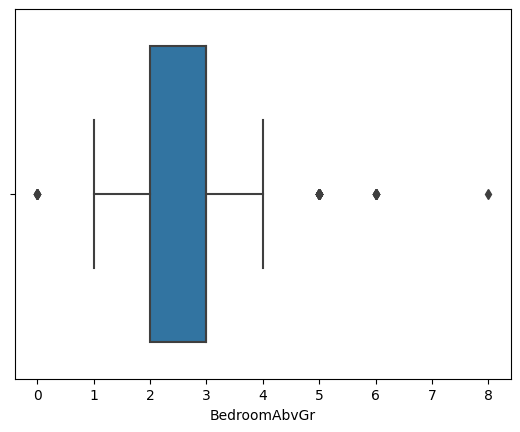

In [105]:
import seaborn as sns 
sns.boxplot(x=data['BedroomAbvGr'])

c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YrSold'>

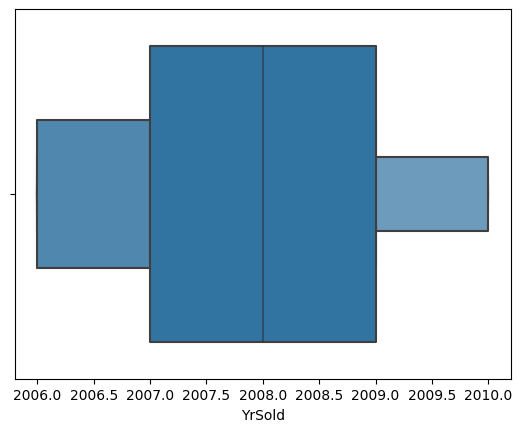

In [32]:
sns.boxenplot(x=data['YrSold'])

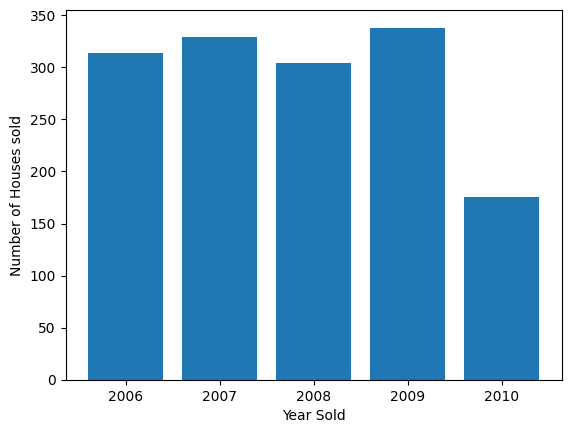

In [33]:
import matplotlib.pyplot as plt 
num_houses = data.groupby('YrSold')['SalePrice'].count()
plt.bar(num_houses.index, num_houses)
plt.xlabel('Year Sold')
plt.ylabel('Number of Houses sold')
plt.show()


<Axes: xlabel='TotRmsAbvGrd'>

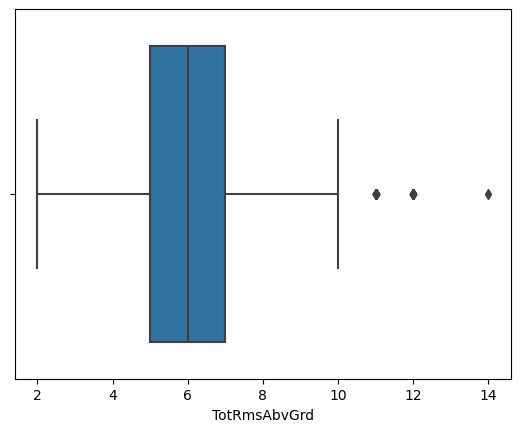

In [34]:
sns.boxplot(x=data['TotRmsAbvGrd'])
#The boundary for outlier is 10.0, So there are 3 outliers

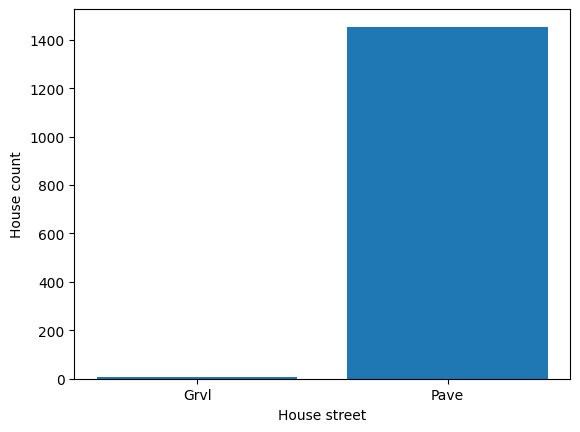

In [35]:
street_houses = data.groupby('Street')['SalePrice'].count()

plt.bar(street_houses.index, street_houses)
plt.xlabel('House street')
plt.ylabel('House count')
plt.show()

In [36]:
print(street_houses)

Street
Grvl       6
Pave    1454
Name: SalePrice, dtype: int64


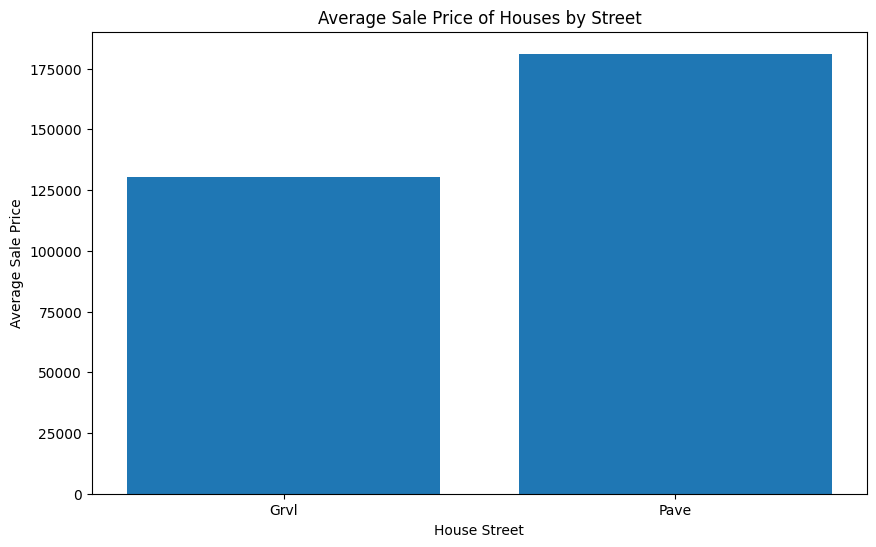

In [42]:
street_avg_price = data.groupby('Street')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(street_avg_price.index, street_avg_price)
plt.xlabel('House Street')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by Street')
plt.show()

c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice'>

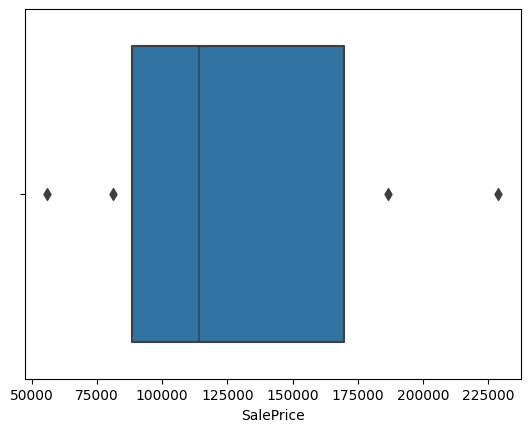

In [43]:
sns.boxenplot(x=data[data['Street'] == 'Grvl']['SalePrice'])
#There are only 6 datapoints and there is already 4 ouliers which means the Grvl street data is not of any specific use case. So we can delete the data['Street] data

c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice'>

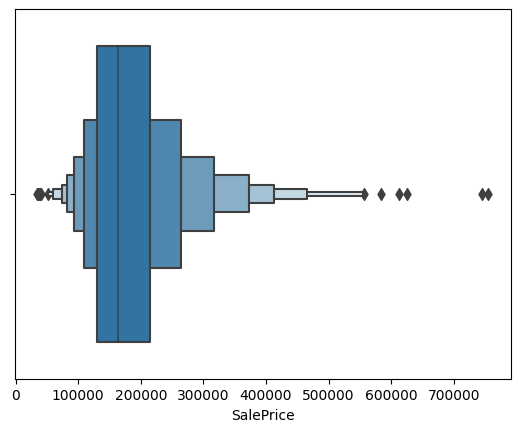

In [44]:
sns.boxenplot(x=data[data['Street'] == 'Pave']['SalePrice'])

In [22]:
data = data.drop('Street', axis=1)

c:\Users\Sanje\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice'>

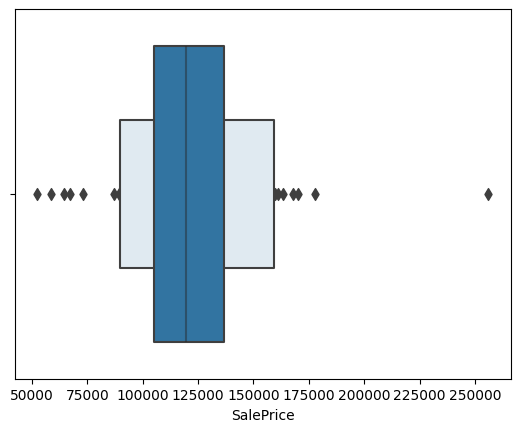

In [45]:
sns.boxenplot(x=data[data['Alley'] == 'Grvl']['SalePrice'])
#This has 50 points and around 10 putliers which could add some weight in prediction

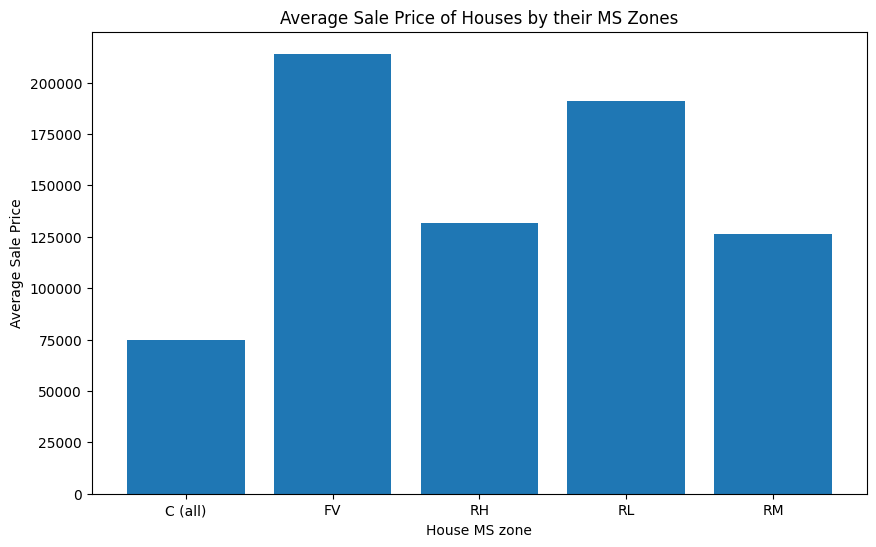

In [46]:
zonal_avg_price = data.groupby('MSZoning')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
plt.bar(zonal_avg_price.index, zonal_avg_price)
plt.xlabel('House MS zone')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price of Houses by their MS Zones')
plt.show()
#So from the plot we can analyze that the Average price of FV zone is comparatively higher

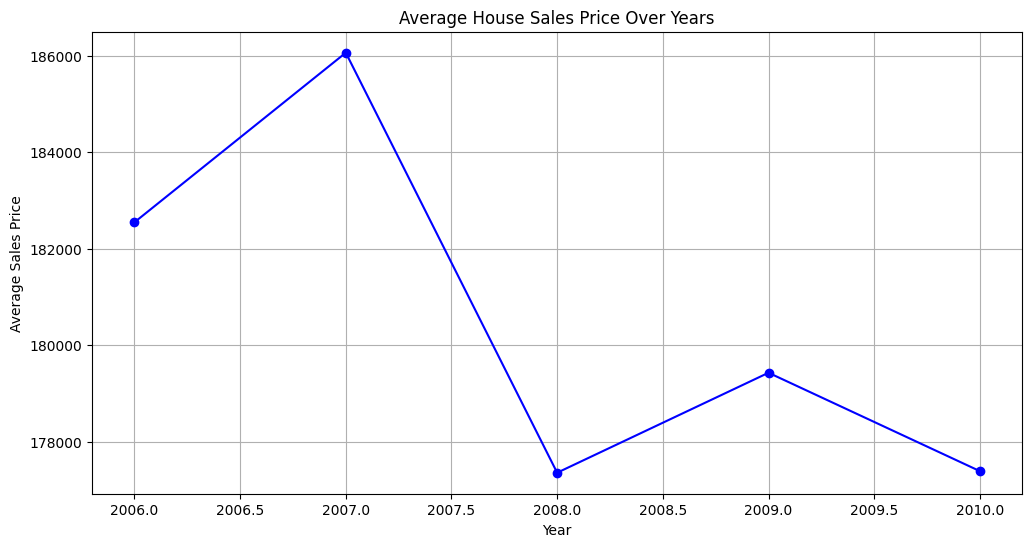

In [112]:
df_yearly = data.groupby('YrSold')['SalePrice'].mean().reset_index()

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df_yearly['YrSold'], df_yearly['SalePrice'], marker='o', linestyle='-', color='b')
plt.title('Average House Sales Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sales Price')
plt.grid()
plt.show()
#We can see that the proces have skyrocketed in 2007 compared to the other months

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols), # Impute numerical columns
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ])
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Ridge Regression": Ridge(),# I use ridge regreession to add the regularisation step to a normal regression model to avoid overfitting.
    # Additional models can be added here
}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {rmse:.2f}, R^2 Score: {r2:.2f}")


Random Forest - Mean Squared Error: 27844.66, R^2 Score: 0.90
Ridge Regression - Mean Squared Error: 35862.75, R^2 Score: 0.83
